In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timezone, timedelta
from dateutil import tz
import pickle

# Importing course datasets
rides = pd.read_csv('../datasets/capital-onebike.csv')
with open('../datasets/florida_hurricane_dates.pkl', 'rb') as f:
    florida_hurricane_dates = pickle.load(f)
florida_hurricane_dates = sorted(florida_hurricane_dates)

# create the needed list by querying the list.
onebike_datetime_strings = rides[['Start date', 'End date']].values.tolist()

# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
    trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
    # Append the trip
    onebike_datetimes.append(trip)

rides.head() # Display the first five rows

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


# Reading date and time data in Pandas

### Loading a csv file in Pandas

In [2]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
# NOTE: I Changed the location of the csv to work with my datasets folder'
rides = pd.read_csv('../datasets/capital-onebike.csv', 
                    parse_dates = ['Start date', 'End date'])

# Print the initial (0th) row
print(rides.iloc[0])

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


# Making timedelta columns

In [3]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


# Summarizing datetime data in Pandas

### How many joyrides?

In [4]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### It's getting cold outside, W20529

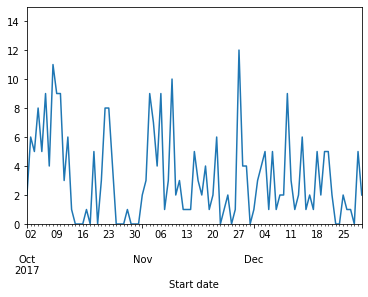

In [5]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

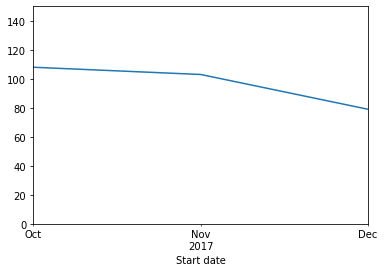

In [6]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

### Members vs casual riders over time

In [7]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on = 'Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Combining groupby() and resample()

In [8]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on = 'Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


# Additional datetime methods in Pandas

### Timezones in Pandas

In [9]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00


In [10]:
# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 20:23:25+01:00


### How long per weekday?

In [13]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64


### How long between rides?

In [17]:
# remove the timezones to avoid errors in the next section
rides['Start date'] = rides['Start date'].dt.tz_localize(None)
rides['End date'] = rides['End date'].dt.tz_localize(None)

In [18]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on = 'Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31    10.519242
2017-11-30    12.053385
2017-12-31    14.202380
Name: Time since, dtype: float64
